In [255]:
%pylab inline

import os, sys 

sys.path.append('/Users/silas/Documents/GitHub/genome_sketch/scripts/')

from common import genome_pdist as gd

Populating the interactive namespace from numpy and matplotlib


In [256]:
%cd ~/Desktop/Plasmids/

/Users/silas/Desktop/Plasmids


In [257]:
!rename.sh in=plasmids.fasta out=plasmids.renamed.fasta.gz prefix='plasmid'

/Users/silas/miniconda3/opt/bbmap-38.79-0//calcmem.sh: line 75: [: -v: unary operator expected
java -ea -Xmx1g -cp /Users/silas/miniconda3/opt/bbmap-38.79-0/current/ jgi.RenameReads in=plasmids.fasta out=plasmids.renamed.fasta.gz prefix=plasmid
Executing jgi.RenameReads [in=plasmids.fasta, out=plasmids.renamed.fasta.gz, prefix=plasmid]

Time: 16.246 seconds.


In [278]:
!ls 

AAI.tsv                        nt.sketch
ANI.tsv                        plasmid_aa.sketch
deduplicated_plasmids.fasta    plasmids.deduplicated.fasta.gz
deduplicated_plasmids.fasta.gz plasmids.fasta
duplicated_plasmids.txt        plasmids.renamed.fasta.gz
logs                           virus_aa.sketch


In [270]:
!dedupe.sh 


Written by Brian Bushnell and Jonathan Rood
Last modified February 19, 2020

Description:  Accepts one or more files containing sets of sequences (reads or scaffolds).
Removes duplicate sequences, which may be specified to be exact matches, subsequences, or sequences within some percent identity.
Can also find overlapping sequences and group them into clusters.
Please read bbmap/docs/guides/DedupeGuide.txt for more information.

Usage:     dedupe.sh in=<file or stdin> out=<file or stdout>

An example of running Dedupe for clustering short reads:
dedupe.sh in=x.fq am=f ac=f fo c pc rnc=f mcs=4 mo=100 s=1 pto cc qin=33 csf=stats.txt pattern=cluster_%.fq dot=graph.dot

Input may be fasta or fastq, compressed or uncompressed.
Output may be stdout or a file.  With no output parameter, data will be written to stdout.
If 'out=null', there will be no output, but statistics will still be printed.
You can also use 'dedupe <infile> <outfile>' without the 'in=' and 'out='.

I/O parameters:
in=<fi

In [283]:
%%!

dedupe.sh \
in="plasmids.renamed.fasta.gz" \
fo=t cluster=t pickbestrepresentative \
maxedits=10 maxsubs=30 \
out="plasmids.deduplicated.fasta.gz" overwrite -Xmx24g

['/Users/silas/miniconda3/opt/bbmap-38.79-0//calcmem.sh: line 75: [: -v: unary operator expected',
 'java -ea -Xmx24g -Xms24g -cp /Users/silas/miniconda3/opt/bbmap-38.79-0/current/ jgi.Dedupe in=plasmids.renamed.fasta.gz fo=t cluster=t pickbestrepresentative maxedits=10 maxsubs=20 out=plasmids.deduplicated.fasta.gz overwrite -Xmx24g',
 'Executing jgi.Dedupe [in=plasmids.renamed.fasta.gz, fo=t, cluster=t, pickbestrepresentative, maxedits=10, maxsubs=20, out=plasmids.deduplicated.fasta.gz, overwrite, -Xmx24g]',
 'Version 38.79',
 '',
 'Initial:',
 'Memory: max=25769m, total=25769m, free=25761m, used=8m',
 '',
 'Found 11210 duplicates.',
 'Finished exact matches.    Time: 4.495 seconds.',
 'Memory: max=25769m, total=25769m, free=25157m, used=612m',
 '',
 'Found 4757 contained sequences.',
 'Finished containment.      Time: 7.716 seconds.',
 'Memory: max=25769m, total=25769m, free=25115m, used=654m',
 '',
 'Removed 4757 invalid entries.',
 'Finished invalid removal.  Time: 0.031 seconds.',

In [284]:
%%!

bbsketch.sh translate=t mode=sequence \
in="plasmids.deduplicated.fasta.gz" \
out=plasmid_aa.sketch \
overwrite

comparesketch.sh alltoall \
amino=true in=plasmid_aa.sketch \
out=AAI.tsv overwrite=true format=3 -Xmx24g

['/Users/silas/miniconda3/opt/bbmap-38.79-0//calcmem.sh: line 75: [: -v: unary operator expected',
 'Max memory cannot be determined.  Attempting to use 4000 MB.',
 'If this fails, please add the -Xmx flag (e.g. -Xmx24g) to your command, ',
 'or run this program qsubbed or from a qlogin session on Genepool, or set ulimit to an appropriate value.',
 'java -ea -Xmx4000m -Xms4000m -cp /Users/silas/miniconda3/opt/bbmap-38.79-0/current/ sketch.SketchMaker translate=t mode=sequence in=plasmids.deduplicated.fasta.gz out=plasmid_aa.sketch overwrite',
 'Set k to 12,9',
 'Loading sketches.',
 'Loaded 12921 sketches in 13.452 seconds.',
 'Total Time: \t13.466 seconds.',
 '/Users/silas/miniconda3/opt/bbmap-38.79-0//calcmem.sh: line 75: [: -v: unary operator expected',
 'Set k to 12,9',
 'Loading sketches.',
 'Executing kmer.KmerTableSet [ways=31, tabletype=10, prealloc=f]',
 '',
 'Initial:',
 'Ways=31, initialSize=128000, prefilter=f, prealloc=f',
 'Memory: max=25769m, total=25769m, free=25639m, u

In [285]:

import pandas as pd
import seaborn as sns


In [286]:
D=gd.load_bbsketch('AAI.tsv')

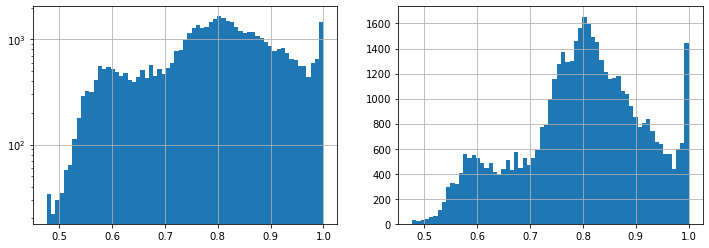

In [310]:
f,axe= plt.subplots(1,2,figsize=(12,4))
D.Identity.hist(bins='auto',ax=axe[0],log=True)
D.Identity.hist(bins='auto',ax=axe[1])


In [295]:
overlapping= D.query('Identity>0.99')

In [296]:
overlapping


,,AAI,QSize,RefSize,QBases,RBases,KID,WKID,SSU,Identity
plasmid_42067,plasmid_41168,99.794,1262,2498,1361,2870,50.777,98.000,NaN,0.99794
plasmid_26464,plasmid_27383,99.686,44351,44056,46041,45761,96.401,96.876,NaN,0.99686
plasmid_7325,plasmid_13748,99.848,597,557,621,581,94.444,98.551,NaN,0.99848
plasmid_12744,plasmid_5272,99.206,566,540,620,620,87.500,91.304,NaN,0.99206
plasmid_21595,plasmid_1633,100.000,569,567,630,591,98.592,100.000,NaN,1.00000
...,...,...,...,...,...,...,...,...,...,...
plasmid_40374,plasmid_24657,100.000,126,524,148,568,26.761,100.000,NaN,1.00000
plasmid_26162,plasmid_16413,100.000,151,313,173,324,41.379,100.000,NaN,1.00000
plasmid_49768,plasmid_46669,99.036,143,175,210,296,70.370,86.364,NaN,0.99036
plasmid_41929,plasmid_41661,99.196,170,164,209,209,85.185,88.462,NaN,0.99196


In [297]:
lengths= pd.concat((
    D.groupby(level=0).QBases.first(),
    D.groupby(level=1).RBases.first()
))
lengths=lengths.loc[~lengths.index.duplicated()]

(array([4.700e+01, 9.360e+02, 2.855e+03, 1.179e+03, 6.600e+02, 5.080e+02,
        5.690e+02, 1.970e+02, 7.500e+01, 2.000e+00]),
 array([1.73239376, 2.12422757, 2.51606139, 2.9078952 , 3.29972901,
        3.69156283, 4.08339664, 4.47523045, 4.86706427, 5.25889808,
        5.65073189]),
 <a list of 10 Patch objects>)

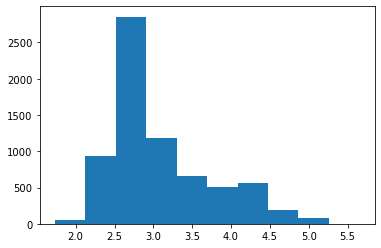

In [298]:
plt.hist(np.log10(lengths))

In [299]:
import networkx as nx
G= gd.to_graph(overlapping)

In [300]:
Grouping=pd.Series(np.nan,index=G.nodes())

for i,cc in enumerate(nx.connected_components(G)):
    Grouping.loc[cc]=lengths.loc[cc].idxmax()

In [301]:
duplicated_contigs= Grouping.index.difference(Grouping.values)

In [302]:
with open('duplicated_plasmids.txt','w') as f: 
    f.write('\n'.join(tuple(duplicated_contigs)))
    
!mkdir -p logs
    

!filterbyname.sh in=plasmids.deduplicated.fasta.gz names=duplicated_plasmids.txt include=f out=plasmids.dereplicated.fasta.gz ow 2> logs/drop_duplicted.log

In [303]:
%%!

bbsketch.sh translate=t mode=sequence \
in=plasmids.dereplicated.fasta.gz \
out=plasmids_aa.sketch \
overwrite

comparesketch.sh alltoall \
amino=true in=plasmids_aa.sketch \
out=AAI.tsv overwrite=true format=3 -Xmx24g

['/Users/silas/miniconda3/opt/bbmap-38.79-0//calcmem.sh: line 75: [: -v: unary operator expected',
 'Max memory cannot be determined.  Attempting to use 4000 MB.',
 'If this fails, please add the -Xmx flag (e.g. -Xmx24g) to your command, ',
 'or run this program qsubbed or from a qlogin session on Genepool, or set ulimit to an appropriate value.',
 'java -ea -Xmx4000m -Xms4000m -cp /Users/silas/miniconda3/opt/bbmap-38.79-0/current/ sketch.SketchMaker translate=t mode=sequence in=plasmids.dereplicated.fasta.gz out=plasmids_aa.sketch overwrite',
 'Set k to 12,9',
 'Loading sketches.',
 'Loaded 12251 sketches in 12.464 seconds.',
 'Total Time: \t12.478 seconds.',
 '/Users/silas/miniconda3/opt/bbmap-38.79-0//calcmem.sh: line 75: [: -v: unary operator expected',
 'Set k to 12,9',
 'Loading sketches.',
 'Executing kmer.KmerTableSet [ways=31, tabletype=10, prealloc=f]',
 '',
 'Initial:',
 'Ways=31, initialSize=128000, prefilter=f, prealloc=f',
 'Memory: max=25769m, total=25769m, free=25639m, 

In [304]:
M = gd.load_bbsketch('AAI.tsv')

M.shape

(38653, 9)

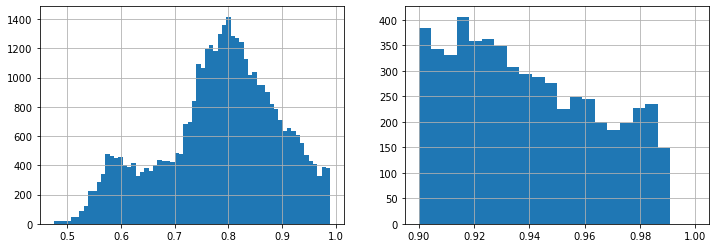

In [313]:
f,axe= plt.subplots(1,2,figsize=(12,4))
M.Identity.hist(bins='auto',ax=axe[0])
M.Identity.hist(bins='auto',range=(0.9,1),ax=axe[1])


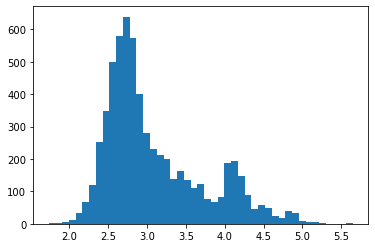

In [308]:
dereplicated=M.index.levels[0].union(M.index.levels[1])
len(dereplicated)

plt.hist(np.log10(lengths.loc[dereplicated]),bins='auto');

In [309]:
lengths.loc[dereplicated].sort_values()

plasmid_44473        54
plasmid_20162        56
plasmid_5688         64
plasmid_6737         73
plasmid_45715        75
                  ...  
plasmid_40132    159390
plasmid_39317    166905
plasmid_485      167128
plasmid_38977    181916
plasmid_3770     447437
Length: 6265, dtype: int64